In [ ]:
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.activations import relu, softmax
from tensorflow.keras import optimizers
import numpy as np
(x_train, y_train),(x_test, y_test)=mnist.load_data()
x_train=x_train.reshape(-1,28*28).astype("float32")/255
x_test=x_test.reshape(-1,28*28).astype("float32")/255

model=keras.Sequential(
    [
        layers.Dense(512,activation=relu),
        layers.Dense(256,activation=relu),
        layers.Dense(128,activation=relu),
        layers.Dense(10),
    ]
)
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]
)
model.fit(x_train,y_train, batch_size=32, epochs=15, verbose=2)
model.evaluate(x_test,y_test, batch_size=32, verbose=2)
os.makedirs("saved_model", exist_ok=True)

model.save("saved_model/my_model.keras")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/15
1875/1875 - 20s - 11ms/step - accuracy: 0.9414 - loss: 0.1954
Epoch 2/15
1875/1875 - 21s - 11ms/step - accuracy: 0.9732 - loss: 0.0876
Epoch 3/15
1875/1875 - 20s - 11ms/step - accuracy: 0.9803 - loss: 0.0617
Epoch 4/15
1875/1875 - 18s - 10ms/step - accuracy: 0.9852 - loss: 0.0474
Epoch 5/15
1875/1875 - 18s - 9ms/step - accuracy: 0.9882 - loss: 0.0377
Epoch 6/15
1875/1875 - 21s - 11ms/step - accuracy: 0.9904 - loss: 0.0312
Epoch 7/15
1875/1875 - 18s - 10ms/step - accuracy: 0.9906 - loss: 0.0286
Epoch 8/15
1875/1875 - 21s - 11ms/step - accuracy: 0.9920 - loss: 0.0263
Epoch 9/15
1875/1875 - 19s - 10ms/step - accuracy: 0.9930 - loss: 0.0216
Epoch 10/15
1875/1875 - 18s - 9ms/step - accuracy: 0.9942 - loss: 0.0193
Epoch 11/15
1875/1875 - 21s - 11ms/step - accuracy: 0.9944 - loss: 0.0182
Epoch 12/15
1875/1875 - 18s - 10ms/step - accuracy: 0.9948 - loss: 0.0167
Epoch 13/15
1875/1875 - 18s - 9ms/step - accuracy: 0.9949 - loss: 0.0172

In [1]:
from google.colab import files
files.download('mnist_ds.ipynb')

FileNotFoundError: Cannot find file: mnist_ds.ipynb

# New section

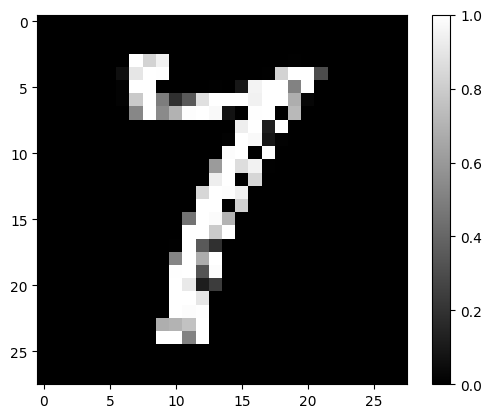

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
Predicted Digit: [3]
Confidence: 95.43%


In [ ]:
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.activations import relu, softmax
from tensorflow.keras import optimizers
import numpy as np
import cv2
import matplotlib.pyplot as plt

model=keras.models.load_model("saved_model/my_model.keras")

image=cv2.imread('/content/digit7.jpeg', cv2.IMREAD_GRAYSCALE)
image=cv2.resize(image,(28,28))
image=255-image
image=image.astype("float32")/255.0

plt.imshow(image, cmap="gray")
plt.colorbar()
plt.show()

image=image.reshape(-1,28*28)

logits=model.predict(image)
probabilities=tf.nn.softmax(logits).numpy()
predicted_digit=tf.argmax(probabilities, axis=1)
confidence=np.max(probabilities)
print(f"Predicted Digit: {predicted_digit}")
print(f"Confidence: {confidence * 100:.2f}%")
